# A one-dimensional diffusion model

Here we develop a one-dimensional model of diffusion.
It assumes a constant diffusivity.
It uses a regular grid.
It has a step function for an initial condition.
It has fixed boundary conditions.

The diffusion equation:
$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$


The discretized version of the diffusion equation we'll solve with our model:

$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the FTCS scheme described in various textbooks. (Also Wikipedia)

The loop for running the model:
for t in range(0, nt):

	C[1:-1] += D * dt / dx ** 2 * (C[:-2] - 2*C[1:-1] + C[2:])

We'll use two libraries: Numpy(for arrays) and Matplotlib (for plots), that arent a part of the core Python library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Start by setting two fixed model parameters,
the diffusivity and the size of the model domain.

In [2]:
D = 100
Lx = 300

Next, set up the model grid with a NumPy array.

In [3]:
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)

In [4]:
nx

600

Setup the initial conditions for the model.
The concentration `C` is a step function with a high value on the left, a low value on the right, and the step at the centre of the domain.

In [11]:
C = np.zeros_like(x)
C_left = 500
C_right = 0
C[x <=Lx//2] = C_left
C[x > Lx//2] = C_right

Plot the initial concentration profile

Text(0.5, 1.0, 'Initial concentration profile')

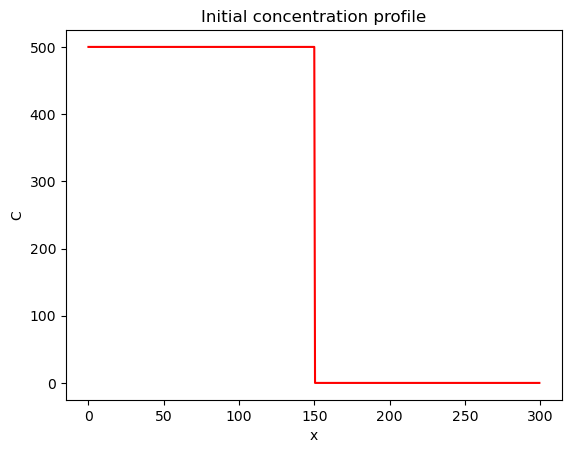

In [12]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial concentration profile")

Set the number of time steps in the model. Calculate a stable time step using a stability criterion

In [13]:
nt = 5000
dt = 0.5 * dx**2 / D

In [14]:
dt

0.00125

Loop over the time steps of the model,
solving the diffusion equation using the FTCS scheme described above.
Note the use of array operations on the concentration `C`.
The boundary conditions remain fixed in each time step.

In [15]:
for t in range(0, nt):

	C[1:-1] += D * dt / dx ** 2 * (C[:-2] - 2*C[1:-1] + C[2:])

Plot the result.

Text(0.5, 1.0, 'Final concentration profile')

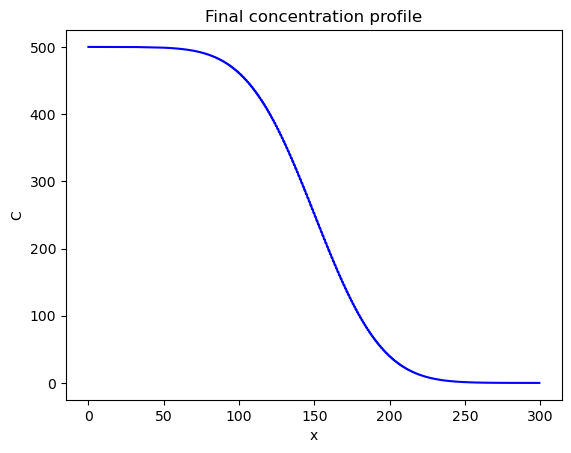

In [17]:
plt.figure()
plt.plot(x, C, "b")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final concentration profile")